In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 11.4 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=4300d529ee96a6f07d78bf653aa4989800d47c0e5a398831ddb72f9ff02d3d74
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [3]:
BTC = yf.download('BTC-USD',start='2016-01-01')['Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
sp500 = yf.download('^GSPC',start='2016-01-01')['Close']

[*********************100%***********************]  1 of 1 completed


In [5]:
aapl = yf.download('AAPL',start='2016-01-01')["Close"]

[*********************100%***********************]  1 of 1 completed


In [6]:
gold = yf.download('GC=F',start='2016-01-01')["Close"]

[*********************100%***********************]  1 of 1 completed


In [7]:
BTC = pd.DataFrame.from_dict(BTC)
#Keep only the close column
BTC = BTC[['Close']]
#Rename the column name to BTC
BTC.columns = ['BTC']
BTC

,BTC
Date,
2016-01-01,434.334015
2016-01-02,433.437988
2016-01-03,430.010986
2016-01-04,433.091003
2016-01-05,431.959991
...,...
2021-10-15,61593.949219
2021-10-16,60892.179688
2021-10-17,61553.617188


In [8]:
sp500 = pd.DataFrame.from_dict(sp500)
#Keep only the close column
sp500 = sp500[['Close']]
#Rename the column name to sp500
sp500.columns = ['sp500']
sp500

,sp500
Date,
2016-01-04,2012.660034
2016-01-05,2016.709961
2016-01-06,1990.260010
2016-01-07,1943.089966
2016-01-08,1922.030029
...,...
2021-10-12,4350.649902
2021-10-13,4363.799805
2021-10-14,4438.259766


In [9]:
gold = pd.DataFrame.from_dict(gold)
#Keep only the close column
gold = gold[['Close']]
#Rename the column name to gold
gold.columns = ['gold']
gold

,gold
Date,
2016-01-04,1075.099976
2016-01-05,1078.400024
2016-01-06,1091.900024
2016-01-07,1107.699951
2016-01-08,1097.800049
...,...
2021-10-12,1758.300049
2021-10-13,1793.699951
2021-10-14,1796.699951


In [10]:
aapl = pd.DataFrame.from_dict(aapl)
#Keep only the close column
aapl = aapl[['Close']]
#Rename the column name to aapl
aapl.columns = ['aapl']
aapl

,aapl
Date,
2016-01-04,26.337500
2016-01-05,25.677500
2016-01-06,25.174999
2016-01-07,24.112499
2016-01-08,24.240000
...,...
2021-10-12,141.509995
2021-10-13,140.910004
2021-10-14,143.759995


In [13]:
df = BTC.merge(gold, how='inner',right_index = True, left_index=True)

In [14]:
df

,BTC,gold
Date,,
2016-01-04,433.091003,1075.099976
2016-01-05,431.959991,1078.400024
2016-01-06,429.105011,1091.900024
2016-01-07,458.048004,1107.699951
2016-01-08,453.230011,1097.800049
...,...,...
2021-10-12,56041.058594,1758.300049
2021-10-13,57401.097656,1793.699951
2021-10-14,57321.523438,1796.699951




Here are GOLD and Bitcoin prices related to each other


           BTC      gold
BTC   1.000000  0.682044
gold  0.682044  1.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


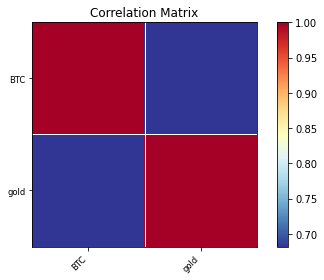

In [17]:
# use pandas dataframe.corr() to find the correlation of our Pandas DataFrame columns:
correlation = df.corr()
print("\n")
print(f"Here are GOLD and Bitcoin prices related to each other")
print("\n")
print(correlation)
print
#
# How to interpret the correlation between BTC and Gold prices?
# The values from a correlation matrix range from -1 to 1. 
# Closer to +1 means that both variables move closely together and in the same direction. 
# A value of 0 meaning that there is no relationship between the variables. 
# A negative correlation indicates that the variables move in different directions. 
# The closer to -1 the stronger the inverse relationship.

from statsmodels import api as sm
import matplotlib.pyplot as plt


# print correlation graph 
print("\n")
print("\n")
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()

In [19]:
!pip install hvplot

     |████████████████████████████████| 3.1 MB 7.6 MB/s 


In [20]:
import hvplot.pandas
#import plotly.express as px

Output hidden; open in https://colab.research.google.com to view.

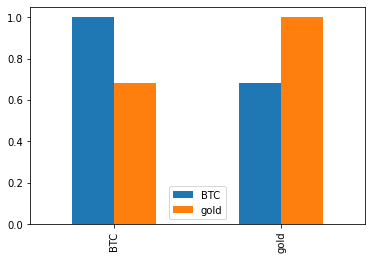

In [21]:
correlation.head().plot(kind='bar')

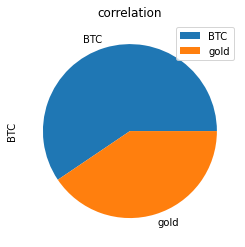

In [22]:
print("\n")
print("\n")
correlation.plot.pie(y=0, title = "correlation")